In [67]:
# -*- coding: utf-8 -*-

## standard packages
import numpy as np
import os
import datetime
from importlib import reload

import configparser
import json

## Database
import sqlite3

import matplotlib.pyplot as plt

import sklearn

import src.utils as utils

In [26]:
database = utils.DataBase(os.getcwd() + "/src/DataBase/carStats.db")

In [27]:
database.connect()

In [28]:
cursor = database.getCursor()
adData = database.execute("""SELECT * FROM car""")

In [31]:
adData = np.array(adData)
adData.shape

(31449, 47)

In [32]:
adData[0]

array([130918008, 'USED', 'EUR', 12, 1992, 850.0, 'Car', 'PETROL', 588,
       'Audi', '1900', 'Audi 80', '80',
       '80 B4 auch Tausch gegen ETS 250 !!!', '5', 'Jena', 'DE', 7749,
       None, 'True', 'DEALER', '84.153.133.0', 'Limousine',
       'No Information', '141.650\xa0km', '1.984\xa0cm³',
       '66\xa0kW\xa0(90\xa0PS)', 'Benzin', None, None, 5, '4/5',
       'Schaltgetriebe', '4 (Grün)', '12/1992', 2, 'No Information',
       'Keine Klimaanlage oder -automatik', 'No Information',
       'No Information', 'Casablancaweiss', None, 'Stoff, Grau',
       'Ausstattung, Leichtmetallfelgen, Schiebedach, Servolenkung, Zentralverriegelung',
       'Deutsches Auto mit deutschen Papieren vom deutschen Autohandel ! Tachostand 141000 km, eine 5.Alufelge liegt im Kofferraum !\n...Das waren wenigstens noch Auto`s-ohne anfällige Elektronik...\nBenzinpumpe gerade erneuert ! läuft gut !\nPreis mit neuem TüV=2.000,- € !\xa0\nOhne 999,- €!\nDer tatsächliche,derzeitige Zustand weicht auf Grund 

In [35]:
cursor = database.getCursor()
keys = []
for desc in cursor.description:
    keys.append(desc[0])
keys

['adid',
 'adcondition',
 'adcurrency',
 'adfirstregmonth',
 'adfirstregyear',
 'adprice',
 'adsegment',
 'adspecificsfuel',
 'adspecificshsn',
 'adspecificsmake',
 'adspecificsmakeid',
 'adspecificsmakemodel',
 'adspecificsmodel',
 'adspecificsmodeldescription',
 'adspecificsmodelid',
 'dealercity',
 'dealercountry',
 'dealerzip',
 'featurevariants',
 'isdealer',
 'sellertype',
 'usersipaddress',
 'category',
 'countryversion',
 'mileage',
 'cubiccapacity',
 'power',
 'fuel',
 'fuelconsumption',
 'emission',
 'numseats',
 'doorcount',
 'transmission',
 'emissionssticker',
 'firstregistration',
 'numberofpreviousowners',
 'hu',
 'climatisation',
 'parkassist',
 'airbag',
 'manufacturercolorname',
 'color',
 'interior',
 'features',
 'description',
 'firstseen',
 'lastseen']

In [44]:
def dataToJson(keys, valueList):
    returnDict = dict()
    
    for value in valueList:
        returnDict[value[0]] = dict()
        for i in range(len(keys)):
            returnDict[value[0]][keys[i]] = value[i]
                
    return returnDict

adDict = dataToJson(keys, adData)
  

In [53]:
from collections import Counter

In [60]:
for i, v in enumerate(keys):
    print( i, v)

0 adid
1 adcondition
2 adcurrency
3 adfirstregmonth
4 adfirstregyear
5 adprice
6 adsegment
7 adspecificsfuel
8 adspecificshsn
9 adspecificsmake
10 adspecificsmakeid
11 adspecificsmakemodel
12 adspecificsmodel
13 adspecificsmodeldescription
14 adspecificsmodelid
15 dealercity
16 dealercountry
17 dealerzip
18 featurevariants
19 isdealer
20 sellertype
21 usersipaddress
22 category
23 countryversion
24 mileage
25 cubiccapacity
26 power
27 fuel
28 fuelconsumption
29 emission
30 numseats
31 doorcount
32 transmission
33 emissionssticker
34 firstregistration
35 numberofpreviousowners
36 hu
37 climatisation
38 parkassist
39 airbag
40 manufacturercolorname
41 color
42 interior
43 features
44 description
45 firstseen
46 lastseen


In [198]:
Counter(adData[:, 18])

Counter({None: 31449})

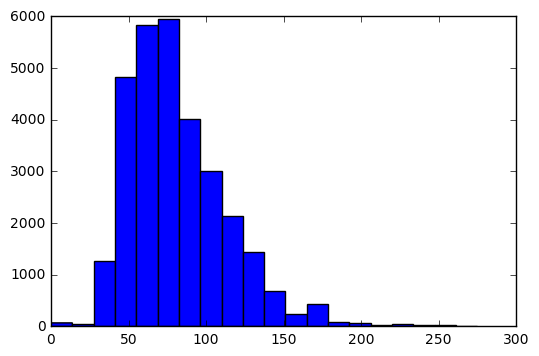

In [201]:
power = processData(adData[:, 26])
power.sort()
plt.hist(power[:-10], bins=20)
plt.show()

In [202]:
string = adData[5, 25]
string.find('\xa0'), string[-4]

(3, '\xa0')

In [203]:
i=25
keys[i], Counter(adData[:, i])

('cubiccapacity',
 Counter({'1.000\xa0cm³': 17,
          '1.043\xa0cm³': 40,
          '1.046\xa0cm³': 1,
          '1.061\xa0cm³': 6,
          '1.080\xa0cm³': 1,
          '1.084\xa0cm³': 1,
          '1.085\xa0cm³': 1,
          '1.086\xa0cm³': 83,
          '1.097\xa0cm³': 2,
          '1.098\xa0cm³': 1,
          '1.100\xa0cm³': 6,
          '1.108\xa0cm³': 75,
          '1.116\xa0cm³': 5,
          '1.119\xa0cm³': 7,
          '1.120\xa0cm³': 12,
          '1.123\xa0cm³': 1,
          '1.124\xa0cm³': 136,
          '1.143\xa0cm³': 1,
          '1.149\xa0cm³': 415,
          '1.150\xa0cm³': 5,
          '1.170\xa0cm³': 1,
          '1.171\xa0cm³': 13,
          '1.184\xa0cm³': 1,
          '1.185\xa0cm³': 1,
          '1.189\xa0cm³': 1,
          '1.190\xa0cm³': 1,
          '1.191\xa0cm³': 8,
          '1.193\xa0cm³': 3,
          '1.195\xa0cm³': 56,
          '1.196\xa0cm³': 1,
          '1.197\xa0cm³': 196,
          '1.198\xa0cm³': 527,
          '1.199\xa0cm³': 201,
        

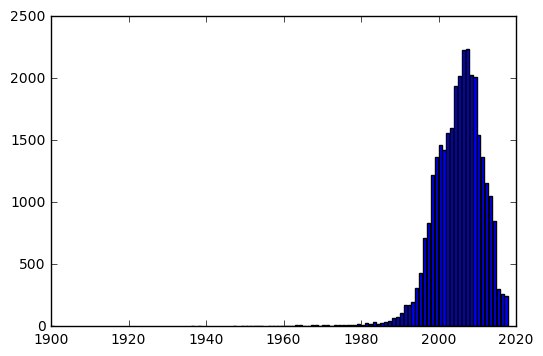

In [204]:
count = Counter(adData[:, 4])
count.pop(None)
plt.bar(count.keys(), count.values())
plt.show()

In [205]:
mileage = []
for value in adData[:, 24]:
    if 'No Information' not in value:
        mileage.append(int(value[:-3].replace('.', '')))
len(mileage)

31438

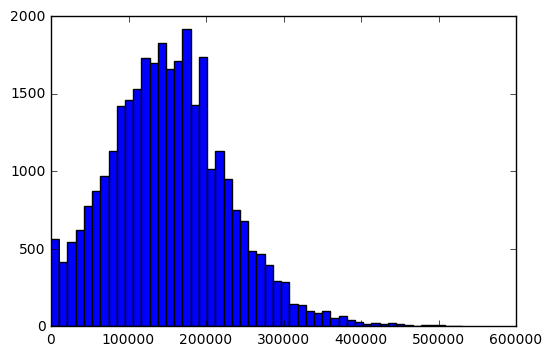

In [207]:
mileage.sort()
plt.hist(mileage[:-50], bins=50)
plt.show()

In [208]:
ccap = []
for value in adData[:, 25]:
    if 'No Information' not in value:
        ccap.append(int(value[:-3].replace('.', '')))
len(ccap)

23738

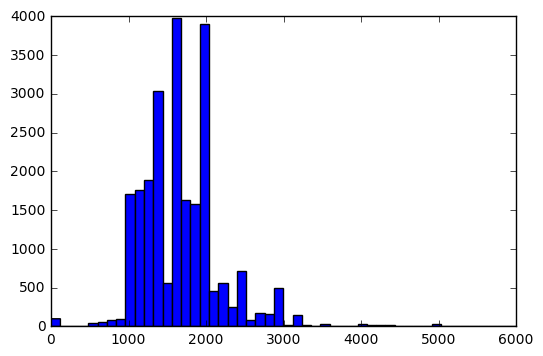

In [209]:
ccap.sort()
plt.hist(ccap[:-10], bins=50)
plt.show()